In [30]:
%matplotlib inline
import inspect, os, sys, copy, pytz, re, glob, csv, math, random, time
import simplejson as json
import pandas as pd
from dateutil import parser
import datetime
import matplotlib.pyplot as plt   # Matplotlib for plotting
import matplotlib.dates as md
import numpy as np
import seaborn as sns
from collections import Counter, defaultdict
import re, urllib


# Load Dataset of r/technology Posts

In [27]:
post_csv_path = os.path.join("/home/nathan/branches/CivilServant-poweranalysis/outputs", 
                            "sticky_comment_power_analysis_2qh16_7.2017_12.2017_posts.csv")
all_front_posts = []
with open(post_csv_path, "r") as f:
    for row in csv.DictReader(f):
        if(int(row['front_page'])>0):
            all_front_posts.append(row)
print("{0} threads appeared on the front page in this period".format(len(all_front_posts)))

123 threads appeared on the front page in this period


### Summary Statistics About Comments on Posts

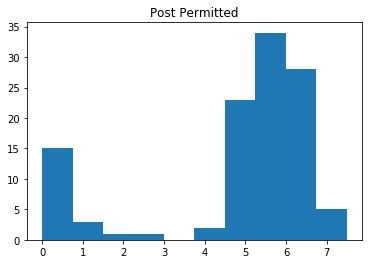

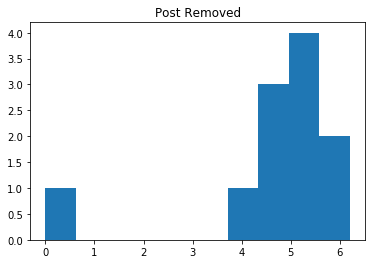

In [28]:
plt.hist([math.log1p(int(x['newcomer.comments'])) for x in all_front_posts if x['visible']=='True'])
plt.title("Post Permitted")
plt.show()

plt.hist([math.log1p(int(x['newcomer.comments'])) for x in all_front_posts if x['visible']=='False'])
plt.title("Post Removed")
plt.show()

### Count the total number of comments from all front page posts

In [29]:
print("{0} mean comments per front page article".format(
    np.mean([int(x['num.comments']) for x in all_front_posts])))

print("{0} mean newcomer comments per front page article".format(
    np.mean([int(x['newcomer.comments']) for x in all_front_posts])))

1940.560975609756 mean comments per front page article
288.3983739837398 mean newcomer comments per front page article


### Randomly sample 20 posts that appeared on the front page

In [34]:
sample_size = 20

#print(time.time())
random_seed = 1523541732.4927142 
random.seed(random_seed)
sampled_front_posts = random.sample(all_front_posts, sample_size)

In [41]:
print("Sampled Front Page Posts")
print("Total expected comment count: {0}".format(sum([int(x['num.comments']) for x in sampled_front_posts])))
[x['id'] for x in sampled_front_posts]

Sampled Front Page Posts
Total expected comment count: 43577


['6ruzg0',
 '7btl9y',
 '71ai2z',
 '78l5ev',
 '7mmjij',
 '79770i',
 '6t85bx',
 '77laz8',
 '6whho2',
 '7dpvc7',
 '7e6kbn',
 '7c8xmx',
 '78fcij',
 '743jxw',
 '7f2r7k',
 '7fxy2o',
 '6s1mge',
 '6u9ip1',
 '70ni9a',
 '73w7un']